In [5]:
# Import library
import pandas as pd
from google.colab import files



# Baca CSV setelah diupload
df = pd.read_csv('SuperMarket Analysis.csv')

# Ambil 20 data pertama
df_sample = df.head(20)

# Tambahkan styling agar tabel lebih enak dibaca
styled_table = df_sample.style.set_properties(**{
    'background-color': '#f0f8ff',  # Light blue background
    'color': 'black',
    'border-color': 'black',
    'border-style': 'solid',
    'border-width': '1px',
    'padding': '5px'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4682b4'),  # Steel blue header
                                 ('color', 'white'),
                                 ('font-weight', 'bold')]}
])

# Tampilkan tabel
styled_table


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,1/5/2019,1:08:00 PM,Ewallet,522.830000,4.761905,26.141500,9.100000
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,3/8/2019,10:29:00 AM,Cash,76.400000,4.761905,3.820000,9.600000
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.330000,7,16.215500,340.525500,3/3/2019,1:23:00 PM,Credit card,324.310000,4.761905,16.215500,7.400000
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.220000,8,23.288000,489.048000,1/27/2019,8:33:00 PM,Ewallet,465.760000,4.761905,23.288000,8.400000
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.310000,7,30.208500,634.378500,2/8/2019,10:37:00 AM,Ewallet,604.170000,4.761905,30.208500,5.300000
5,699-14-3026,Giza,Naypyitaw,Member,Female,Electronic accessories,85.390000,7,29.886500,627.616500,3/25/2019,6:30:00 PM,Ewallet,597.730000,4.761905,29.886500,4.100000
6,355-53-5943,Alex,Yangon,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,2/25/2019,2:36:00 PM,Ewallet,413.040000,4.761905,20.652000,5.800000
7,315-22-5665,Giza,Naypyitaw,Member,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,2/24/2019,11:38:00 AM,Ewallet,735.600000,4.761905,36.780000,8.000000
8,665-32-9167,Alex,Yangon,Member,Female,Health and beauty,36.260000,2,3.626000,76.146000,1/10/2019,5:15:00 PM,Credit card,72.520000,4.761905,3.626000,7.200000
9,692-92-5582,Cairo,Mandalay,Member,Female,Food and beverages,54.840000,3,8.226000,172.746000,2/20/2019,1:27:00 PM,Credit card,164.520000,4.761905,8.226000,5.900000


Data Sample:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.141

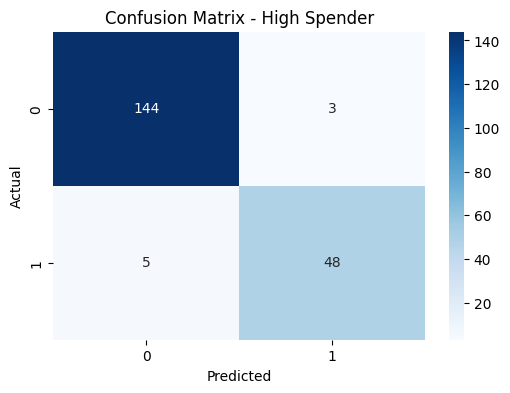

In [7]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Baca dataset (ganti nama file sesuai yang diupload)
df = pd.read_csv(list(uploaded.keys())[0])

# Cek 5 baris awal
print("Data Sample:")
print(df.head())

# Buat kolom Total jika belum ada
df['Total'] = df['Unit price'] * df['Quantity'] + df['Tax 5%']

# Buat label High Spender berdasarkan Q3 (kuartil 75%)
q3 = df['Total'].quantile(0.75)
df['High Spender'] = df['Total'].apply(lambda x: 1 if x >= q3 else 0)

print(f"\nThreshold High Spender (Q3): {q3}")
print(df[['Total', 'High Spender']].head(10))

# Encode fitur kategorikal
le_gender = LabelEncoder()
le_city = LabelEncoder()
le_product = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['City'] = le_city.fit_transform(df['City'])
df['Product line'] = le_product.fit_transform(df['Product line'])

# Pilih fitur dan label
features = ['Gender', 'City', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total']
X = df[features]
y = df['High Spender']

# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Buat dan latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = knn.predict(X_test)

print("\nClassification Report - High Spender:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualisasi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - High Spender')
plt.show()


Data Sample:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.141

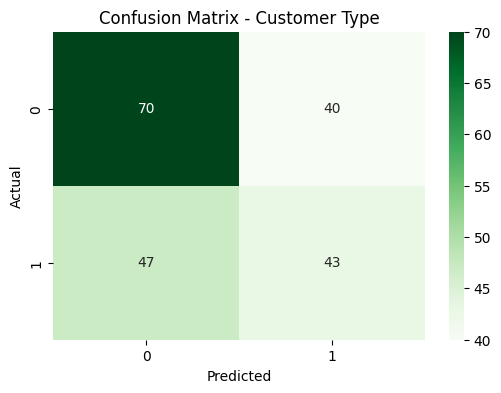

In [9]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Baca dataset (ganti nama file sesuai yang diupload)
df = pd.read_csv(list(uploaded.keys())[0])

# Cek 5 baris awal
print("Data Sample:")
print(df.head())

# Encode fitur kategorikal
le_gender = LabelEncoder()
le_city = LabelEncoder()
le_product = LabelEncoder()
le_customer = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['City'] = le_city.fit_transform(df['City'])
df['Product line'] = le_product.fit_transform(df['Product line'])
df['Customer type'] = le_customer.fit_transform(df['Customer type'])  # Normal:0, Member:1

# Pilih fitur dan label
features = ['Gender', 'City', 'Product line', 'Unit price', 'Quantity', 'Tax 5%']
X = df[features]
y = df['Customer type']

# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Buat dan latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = knn.predict(X_test)

print("\nClassification Report - Customer Type:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualisasi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Customer Type')
plt.show()


In [12]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# Baca dataset
df = pd.read_csv(list(uploaded.keys())[0])

# Buat kolom Total jika belum ada
df['Total'] = df['Unit price'] * df['Quantity'] + df['Tax 5%']

# --- Preprocessing untuk Customer Type ---
le_gender = LabelEncoder()
le_city = LabelEncoder()
le_product = LabelEncoder()
le_customer = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['City'] = le_city.fit_transform(df['City'])
df['Product line'] = le_product.fit_transform(df['Product line'])
df['Customer type label'] = le_customer.fit_transform(df['Customer type'])  # Normal:0, Member:1

features = ['Gender', 'City', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total']
X = df[features]

# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data untuk Customer Type
y_customer = df['Customer type label']
X_train_cust, X_test_cust, y_train_cust, y_test_cust = train_test_split(X_scaled, y_customer, test_size=0.2, random_state=42)

knn_cust = KNeighborsClassifier(n_neighbors=5)
knn_cust.fit(X_train_cust, y_train_cust)
y_pred_cust = knn_cust.predict(X_test_cust)

# --- Preprocessing dan klasifikasi untuk High Spender ---
q3 = df['Total'].quantile(0.75)
df['High Spender'] = df['Total'].apply(lambda x: 1 if x >= q3 else 0)
y_spender = df['High Spender']
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(X_scaled, y_spender, test_size=0.2, random_state=42)

knn_spender = KNeighborsClassifier(n_neighbors=5)
knn_spender.fit(X_train_sp, y_train_sp)
y_pred_spender = knn_spender.predict(X_test_sp)

# --- Buat dataframe hasil klasifikasi ---
# Data test index
test_index = y_test_cust.index

# Data asli dan prediksi untuk Customer Type
df_cust = pd.DataFrame({
    'Actual Customer Type': le_customer.inverse_transform(y_test_cust),
    'Predicted Customer Type': le_customer.inverse_transform(y_pred_cust)
}, index=test_index)

# Data asli dan prediksi untuk High Spender
df_spender = pd.DataFrame({
    'Actual High Spender': y_test_sp.values,
    'Predicted High Spender': y_pred_spender
}, index=test_index)

# Gabungkan tabel
df_result = pd.concat([df_cust, df_spender], axis=1)

# Tampilkan tabel hasil klasifikasi
df_result.reset_index(drop=True, inplace=True)
print(df_result.head(20))


   Actual Customer Type Predicted Customer Type  Actual High Spender  \
0                Member                  Normal                    1   
1                Normal                  Normal                    1   
2                Normal                  Normal                    0   
3                Normal                  Member                    0   
4                Normal                  Normal                    0   
5                Normal                  Normal                    1   
6                Normal                  Normal                    0   
7                Normal                  Normal                    1   
8                Member                  Member                    0   
9                Normal                  Member                    0   
10               Normal                  Member                    0   
11               Member                  Normal                    0   
12               Normal                  Normal                 

In [16]:
import pandas as pd

# Data contoh yang kamu berikan, saya buat ulang sebagai DataFrame
data = {
    'Invoice ID': ['750-67-8428', '226-31-3081', '631-41-3108', '123-19-1176', '373-73-7910',
                   '699-14-3026', '355-53-5943', '315-22-5665'],
    'Branch': ['Alex', 'Giza', 'Alex', 'Alex', 'Alex', 'Giza', 'Alex', 'Giza'],
    'City': ['Yangon', 'Naypyitaw', 'Yangon', 'Yangon', 'Yangon', 'Naypyitaw', 'Yangon', 'Naypyitaw'],
    'Customer type': ['Member', 'Normal', 'Normal', 'Member', 'Member', 'Member', 'Member', 'Member'],
    'Gender': ['Female']*8,
    'Product line': ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Health and beauty',
                     'Sports and travel', 'Electronic accessories', 'Electronic accessories', 'Home and lifestyle'],
    'Unit price': [74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.84, 73.56],
    'Quantity': [7, 5, 7, 8, 7, 7, 6, 10],
    'Tax 5%': [26.1415, 3.82, 16.2155, 23.288, 30.2085, 29.8865, 20.652, 36.78],
    'Sales': [548.9715, 80.22, 340.5255, 489.048, 634.3785, 627.6165, 433.692, 772.38],
    'Date': ['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019', '3/25/2019', '2/25/2019', '2/24/2019'],
    'Time': ['1:08:00 PM', '10:29:00 AM', '1:23:00 PM', '8:33:00 PM', '10:37:00 AM', '6:30:00 PM', '2:36:00 PM', '11:38:00 AM'],
    'Payment': ['Ewallet', 'Cash', 'Credit card', 'Ewallet', 'Ewallet', 'Ewallet', 'Ewallet', 'Ewallet'],
    'cogs': [522.83, 76.4, 324.31, 465.76, 604.17, 597.73, 413.04, 735.6],
    'gross margin percentage': [4.761905]*8,
    'gross income': [26.1415, 3.82, 16.2155, 23.288, 30.2085, 29.8865, 20.652, 36.78],
    'Rating': [9.1, 9.6, 7.4, 8.4, 5.3, 4.1, 5.8, 8.0]
}

df = pd.DataFrame(data)

# Tentukan threshold Sales untuk High Spender, misal > 500 adalah High Spender
threshold = 500
df['Spender_Type'] = df['Sales'].apply(lambda x: 'High Spender' if x > threshold else 'Normal')

# Styling warna baris berdasarkan Spender_Type
def highlight_spender(row):
    color = '#ffcccc' if row['Spender_Type'] == 'High Spender' else '#ccffcc'  # merah muda / hijau muda
    return ['background-color: {}'.format(color)]*len(row)

# Tampilkan tabel dengan styling
df.style.apply(highlight_spender, axis=1).set_properties(**{
    'border': '1px solid black',
    'padding': '5px'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4a90e2'), ('color', 'white'), ('font-weight', 'bold')]}
])


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Spender_Type
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,1/5/2019,1:08:00 PM,Ewallet,522.830000,4.761905,26.141500,9.100000,High Spender
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,3/8/2019,10:29:00 AM,Cash,76.400000,4.761905,3.820000,9.600000,Normal
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.330000,7,16.215500,340.525500,3/3/2019,1:23:00 PM,Credit card,324.310000,4.761905,16.215500,7.400000,Normal
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.220000,8,23.288000,489.048000,1/27/2019,8:33:00 PM,Ewallet,465.760000,4.761905,23.288000,8.400000,Normal
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.310000,7,30.208500,634.378500,2/8/2019,10:37:00 AM,Ewallet,604.170000,4.761905,30.208500,5.300000,High Spender
5,699-14-3026,Giza,Naypyitaw,Member,Female,Electronic accessories,85.390000,7,29.886500,627.616500,3/25/2019,6:30:00 PM,Ewallet,597.730000,4.761905,29.886500,4.100000,High Spender
6,355-53-5943,Alex,Yangon,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,2/25/2019,2:36:00 PM,Ewallet,413.040000,4.761905,20.652000,5.800000,Normal
7,315-22-5665,Giza,Naypyitaw,Member,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,2/24/2019,11:38:00 AM,Ewallet,735.600000,4.761905,36.780000,8.000000,High Spender


In [17]:
import pandas as pd

# Data contoh yang kamu berikan
data = {
    'Invoice ID': ['750-67-8428', '226-31-3081', '631-41-3108', '123-19-1176', '373-73-7910',
                   '699-14-3026', '355-53-5943', '315-22-5665'],
    'Branch': ['Alex', 'Giza', 'Alex', 'Alex', 'Alex', 'Giza', 'Alex', 'Giza'],
    'City': ['Yangon', 'Naypyitaw', 'Yangon', 'Yangon', 'Yangon', 'Naypyitaw', 'Yangon', 'Naypyitaw'],
    'Customer type': ['Member', 'Normal', 'Normal', 'Member', 'Member', 'Member', 'Member', 'Member'],
    'Gender': ['Female']*8,
    'Product line': ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Health and beauty',
                     'Sports and travel', 'Electronic accessories', 'Electronic accessories', 'Home and lifestyle'],
    'Unit price': [74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.84, 73.56],
    'Quantity': [7, 5, 7, 8, 7, 7, 6, 10],
    'Tax 5%': [26.1415, 3.82, 16.2155, 23.288, 30.2085, 29.8865, 20.652, 36.78],
    'Sales': [548.9715, 80.22, 340.5255, 489.048, 634.3785, 627.6165, 433.692, 772.38],
    'Date': ['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019', '3/25/2019', '2/25/2019', '2/24/2019'],
    'Time': ['1:08:00 PM', '10:29:00 AM', '1:23:00 PM', '8:33:00 PM', '10:37:00 AM', '6:30:00 PM', '2:36:00 PM', '11:38:00 AM'],
    'Payment': ['Ewallet', 'Cash', 'Credit card', 'Ewallet', 'Ewallet', 'Ewallet', 'Ewallet', 'Ewallet'],
    'cogs': [522.83, 76.4, 324.31, 465.76, 604.17, 597.73, 413.04, 735.6],
    'gross margin percentage': [4.761905]*8,
    'gross income': [26.1415, 3.82, 16.2155, 23.288, 30.2085, 29.8865, 20.652, 36.78],
    'Rating': [9.1, 9.6, 7.4, 8.4, 5.3, 4.1, 5.8, 8.0]
}

df = pd.DataFrame(data)

# Tentukan threshold Sales untuk High Spender, misal > 500 adalah High Spender
threshold = 500
df['Spender_Type'] = df['Sales'].apply(lambda x: 'High Spender' if x > threshold else 'Normal')

# Styling warna baris berdasarkan Spender_Type dengan warna yang kontras
def highlight_spender(row):
    if row['Spender_Type'] == 'High Spender':
        color = '#ff6666'  # merah agak gelap
    else:
        color = '#99ccff'  # biru muda terang
    return ['background-color: {}'.format(color)]*len(row)

# Tampilkan tabel dengan styling
df.style.apply(highlight_spender, axis=1).set_properties(**{
    'border': '1px solid black',
    'padding': '5px',
    'color': 'black'   # pastikan teks hitam supaya kontras
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#004080'), ('color', 'white'), ('font-weight', 'bold')]}  # header gelap
])


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Spender_Type
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.690000,7,26.141500,548.971500,1/5/2019,1:08:00 PM,Ewallet,522.830000,4.761905,26.141500,9.100000,High Spender
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5,3.820000,80.220000,3/8/2019,10:29:00 AM,Cash,76.400000,4.761905,3.820000,9.600000,Normal
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.330000,7,16.215500,340.525500,3/3/2019,1:23:00 PM,Credit card,324.310000,4.761905,16.215500,7.400000,Normal
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.220000,8,23.288000,489.048000,1/27/2019,8:33:00 PM,Ewallet,465.760000,4.761905,23.288000,8.400000,Normal
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.310000,7,30.208500,634.378500,2/8/2019,10:37:00 AM,Ewallet,604.170000,4.761905,30.208500,5.300000,High Spender
5,699-14-3026,Giza,Naypyitaw,Member,Female,Electronic accessories,85.390000,7,29.886500,627.616500,3/25/2019,6:30:00 PM,Ewallet,597.730000,4.761905,29.886500,4.100000,High Spender
6,355-53-5943,Alex,Yangon,Member,Female,Electronic accessories,68.840000,6,20.652000,433.692000,2/25/2019,2:36:00 PM,Ewallet,413.040000,4.761905,20.652000,5.800000,Normal
7,315-22-5665,Giza,Naypyitaw,Member,Female,Home and lifestyle,73.560000,10,36.780000,772.380000,2/24/2019,11:38:00 AM,Ewallet,735.600000,4.761905,36.780000,8.000000,High Spender
